# Analysis of single-cell TCR repertoires and gene expression from multi-modal scRNA-seq data
From book chapter

In [1]:
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir
import numpy as np

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/data/projects/2022/CRCA/results/v0.1/crc-atlas-dataset/latest/ds_analyses/liana_cell2cell/neutrophil_subclusters/tumor_blood/neutrophil.csv")

In [4]:
df_ss = df[df["cell_type"].isin(['B cell','Macrophage', 'Monocyte', 'NK',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory','Cancer cell'])]

## Neutrophils interactions

In [5]:
df_ss_neutro  = df_ss

In [6]:
df_ss_neutro["cluster_1"] = "Neutrophil"

/tmp/ipykernel_163001/3182691188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss_neutro["cluster_1"] = "Neutrophil"


In [7]:
df_ss_neutro["new_column_neutro"]= df_ss_neutro["source_genesymbol"] +  df_ss_neutro["target_genesymbol"] + df_ss_neutro["source"]+df_ss_neutro["cluster_1"]

/tmp/ipykernel_163001/83736731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss_neutro["new_column_neutro"]= df_ss_neutro["source_genesymbol"] +  df_ss_neutro["target_genesymbol"] + df_ss_neutro["source"]+df_ss_neutro["cluster_1"]


In [8]:
unique_rows_neutro = df_ss_neutro.drop_duplicates(subset="new_column_neutro")

In [9]:
unique_rows_neutro.cell_type.unique()

array(['Cancer cell', 'B cell', 'T cell CD8', 'T cell CD4', 'Monocyte',
       'Macrophage', 'NK', 'T cell regulatory'], dtype=object)

In [10]:
unique_rows_neutro.target.unique()

array(['Cancer cell', 'B cell', 'Schwann cell', 'T cell regulatory',
       'Macrophage', 'Monocyte', 'pDC', 'Plasma cell', 'Endothelial',
       'cDC', 'NK', 'Pericyte', 'Fibroblast', 'Mast cell', 'T cell CD8'],
      dtype=object)

In [11]:
unique_rows_neutro = unique_rows_neutro[unique_rows_neutro["source"].isin(['B cell','Macrophage', 'Monocyte', 'NK',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory','Cancer cell'])]

In [12]:
unique_sources_neutro = unique_rows_neutro['cluster_1'].unique()
unique_targets_neutro = unique_rows_neutro['cell_type'].unique()

In [13]:
interaction_matrix_neutro = pd.DataFrame([(src, tgt) for src in unique_sources_neutro for tgt in unique_targets_neutro], columns=['source', 'target'])

In [14]:
count_df_neutro = unique_rows_neutro.groupby(['cluster_1', 'target']).size().reset_index(name='n')
count_df_neutro.rename(columns = {"cluster_1":"source"}, inplace=True)
interaction_matrix_neutro = interaction_matrix_neutro.merge(count_df_neutro, on=['source', 'target'], how='left').fillna(0)
interaction_matrix_neutro = interaction_matrix_neutro.pivot(index='target', columns='source', values='n').fillna(0)
interaction_matrix_neutro = interaction_matrix_neutro.astype(int)

## All cells interactions

In [15]:
df_ss["new_column"]= df_ss["source_genesymbol"] +  df_ss["target_genesymbol"] + df_ss["source"]+df_ss["target"]

/tmp/ipykernel_163001/2765319709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss["new_column"]= df_ss["source_genesymbol"] +  df_ss["target_genesymbol"] + df_ss["source"]+df_ss["target"]


In [16]:
unique_rows = df_ss.drop_duplicates(subset="new_column")

In [17]:
unique_rows = unique_rows[df["source"].isin(['B cell','Macrophage', 'Monocyte', 'NK',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory','Cancer cell'])]

/tmp/ipykernel_163001/3371825030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = unique_rows[df["source"].isin(['B cell','Macrophage', 'Monocyte', 'NK',


In [18]:
unique_rows = unique_rows[unique_rows["target"].isin(['B cell','Macrophage', 'Monocyte', 'NK',
 'T cell CD4',
 'T cell CD8',
 'T cell regulatory','Cancer cell'])]

In [19]:
unique_sources = unique_rows['cell_type'].unique()
unique_targets = unique_rows['cell_type'].unique()

In [20]:
interaction_matrix = pd.DataFrame([(src, tgt) for src in unique_sources for tgt in unique_targets], columns=['source', 'target'])
count_df = unique_rows.groupby(['source', 'target']).size().reset_index(name='n')
interaction_matrix = interaction_matrix.merge(count_df, on=['source', 'target'], how='left').fillna(0)
interaction_matrix = interaction_matrix.pivot(index='target', columns='source', values='n').fillna(0)
interaction_matrix = interaction_matrix.astype(int)

In [21]:
interaction_matrix_neutro

source,Neutrophil
target,
B cell,5
Cancer cell,25
Macrophage,18
Monocyte,42
NK,25
T cell CD4,0
T cell CD8,11
T cell regulatory,9


In [22]:
interaction_matrix

source,B cell,Cancer cell,Macrophage,Monocyte,NK,T cell CD4,T cell CD8,T cell regulatory
target,,,,,,,,
B cell,0,1,3,4,2,0,2,1
Cancer cell,2,7,21,18,4,2,4,3
Macrophage,9,9,36,30,5,4,6,5
Monocyte,8,7,27,23,6,4,6,6
NK,3,1,11,15,4,3,3,2
T cell CD4,1,2,7,7,2,1,2,1
T cell CD8,5,2,11,12,1,1,1,1
T cell regulatory,5,1,13,13,2,1,2,3


In [23]:
interaction_matrix["Neutrophil"]=list(interaction_matrix_neutro["Neutrophil"])

In [24]:
interaction_matrix = interaction_matrix.T

In [25]:
interaction_matrix

target,B cell,Cancer cell,Macrophage,Monocyte,NK,T cell CD4,T cell CD8,T cell regulatory
source,,,,,,,,
B cell,0,2,9,8,3,1,5,5
Cancer cell,1,7,9,7,1,2,2,1
Macrophage,3,21,36,27,11,7,11,13
Monocyte,4,18,30,23,15,7,12,13
NK,2,4,5,6,4,2,1,2
T cell CD4,0,2,4,4,3,1,1,1
T cell CD8,2,4,6,6,3,2,1,2
T cell regulatory,1,3,5,6,2,1,1,3
Neutrophil,5,25,18,42,25,0,11,9


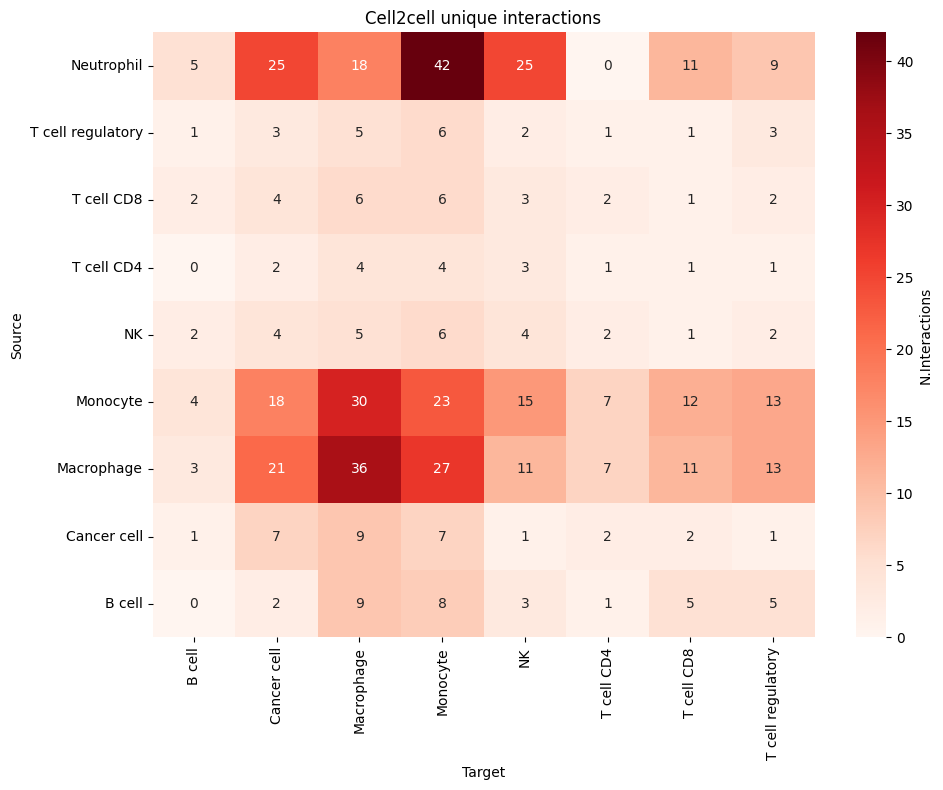

In [26]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(interaction_matrix, annot=True, fmt="d", cmap="Reds", cbar=True)
heatmap.invert_yaxis()
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('N.Interactions')
# Adding labels and title
plt.title('Cell2cell unique interactions')
plt.xlabel('Target')
plt.ylabel('Source')
# Adjust layout to ensure everything fits into the figure area
plt.tight_layout()
plt.savefig('/data/scratch/kvalem/projects/2022/crc_atlas_circos_plot/06-reports/05072024_Zlatko/c2c_unique_heatmap.svg' )
plt.savefig('/data/scratch/kvalem/projects/2022/crc_atlas_circos_plot/06-reports/05072024_Zlatko/c2c_unique_heatmap.png' )

In [27]:
interaction_matrix = np.array(interaction_matrix)
# Sum all the numbers in the interaction matrix
total_sum = np.sum(interaction_matrix)

In [28]:
total_sum

539